In [1]:
# Compare change in median/mean income, i.e. increase, decrease by groups i.e. men 65+ from 2015 to 2022

# Compare change in specific pesticide sales as above

#

In [18]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from pathlib import Path
pd.options.display.max_rows = 4000

In [3]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns


In [4]:
pestUse = pd.read_csv(r"C:\Users\cianw\Documents\dataAnalytics\CA2\Data\Datasets\pestUse.csv")
keepColsLocation = list(pestUse.columns[pestUse.columns.str.contains("IE|EE|pesticid_|crops_")])
keepColsTime = list(pestUse.columns[pestUse.columns.str.contains("2014|2015|pesticid_|crops_")])
pestUse = pestUse.filter(items=keepColsLocation)
pestUse = pestUse.filter(items=keepColsTime) 

In [6]:
missing_values_table(pestUse)

Your selected dataframe has 6 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
IE_2014_y,7239,96.5
IE_2015_y,7184,95.7
EE_2014_y,7090,94.5
EE_2015_y,7023,93.6


In [7]:
keepIre = list(pestUse.columns[pestUse.columns.str.contains("IE|pesticid_|crops_")])
keepEst = list(pestUse.columns[pestUse.columns.str.contains("EE|pesticid_|crops_")])
irePest = pestUse.filter(items=keepIre)
estPest = pestUse.filter(items=keepEst)

In [14]:
irePest = irePest.dropna(subset=['IE_2014_y','IE_2015_y'], how='all')
irePest = irePest.fillna(0) # Filling nulls as data not available for many crops indicates a change from previous year.
irePest["sum"] = irePest[['IE_2014_y','IE_2015_y']].sum(axis=1)
irePest = irePest.drop(irePest[irePest["sum"] == 0].index)
irePest['yearlyChange'] =  irePest['IE_2015_y'] - irePest['IE_2014_y']

In [34]:
irePest2014 = pestUse.filter(list(pestUse.columns[pestUse.columns.str.contains("IE_2014_y|pesticid_|crops_")]))
estPest2014 = pestUse.filter(list(pestUse.columns[pestUse.columns.str.contains("EE_2014_y|pesticid_|crops_")]))
irePest2014 = irePest2014.dropna(subset=['IE_2014_y'], how='all')
estPest2014 = estPest2014.dropna(subset=['EE_2014_y'], how='all')
irePest2014

,pesticid_,crops_,IE_2014_y
136,F01_02,F0000,420.0
137,F01_02,F1000,420.0
139,F01_02,F1110,420.0
140,F01_02,F1112,420.0
185,F01_02,S0000,194.0
186,F01_02,S0000S,194.0
411,F02_03,F0000,754.0
412,F02_03,F1000,754.0
414,F02_03,F1110,754.0
415,F02_03,F1111,120.0


In [15]:
estPest = estPest.dropna(subset=['EE_2014_y','EE_2015_y'], how='all')
estPest = estPest.fillna(0) # Filling nulls as data not available for many crops indicates a change from previous year.
estPest["sum"] = estPest[['EE_2014_y','EE_2015_y']].sum(axis=1)
estPest = estPest.drop(estPest[estPest["sum"] == 0].index)
['yearlyChange'] =  estPest['EE_2015_y'] - estPest['EE_2014_y']

In [24]:
#sns.boxplot(data =  estPest, x ='yearlyChange')

In [27]:
from scipy import stats
ire = irePest['yearlyChange'].to_numpy()
est = estPest['yearlyChange'].to_numpy()
shapiro_test_ire = stats.shapiro(ire)
shapiro_test_est = stats.shapiro(est)
print(shapiro_test_ire)
print(shapiro_test_est)
ks_test_ire = stats.kstest(ire, stats.norm.cdf)
ks_test_est = stats.kstest(est, stats.norm.cdf)
print(ks_test_ire)
print(ks_test_est)

ShapiroResult(statistic=0.3601955771446228, pvalue=2.8785246604328557e-37)
ShapiroResult(statistic=0.2832709550857544, pvalue=1.0139095038622214e-40)
KstestResult(statistic=0.4869690905140238, pvalue=1.104483677006958e-101)
KstestResult(statistic=0.5107106711110942, pvalue=4.6710605659440025e-127)


<AxesSubplot:xlabel='EE_2014_y'>

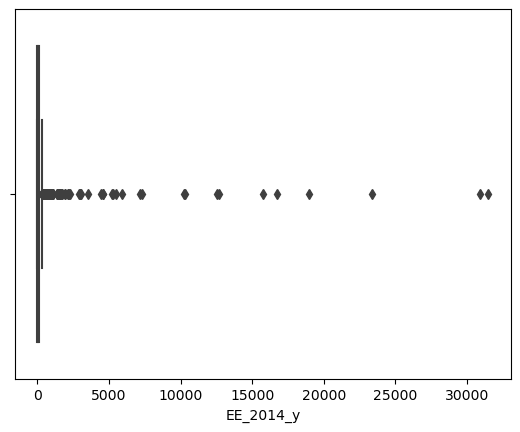

In [29]:
sns.boxplot(data =  estPest, x ='EE_2014_y')

<AxesSubplot:xlabel='IE_2014_y', ylabel='Count'>

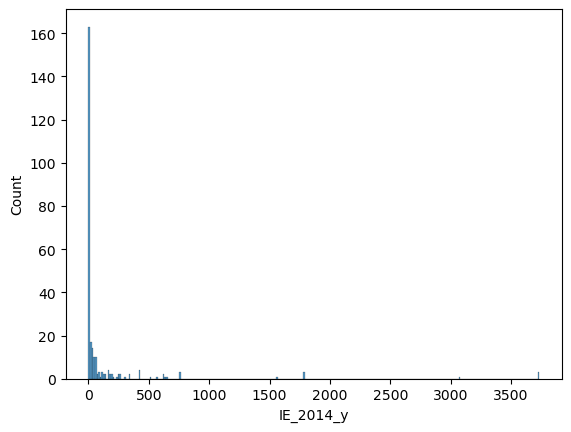

In [35]:
sns.histplot(data =  irePest2014, x ='IE_2014_y')